In [1]:
import numpy as np
import pandas as pd
import random 

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import researchpy as rp
from scipy.stats import levene
from itertools import combinations


plt.rcParams["figure.figsize"] = (10,8) 

# Pair Programming Asunciones Regresión Lineal

    En este ejercicio de pair programming seguiréis usando el dataset que seleccionasteis.


    El objetivo de este pair programming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. 


    1. Normalidad (ya la deberíais haber evaluado)
 
Nuestra variable respuesta no cumple esta condición. Vamos a ir evaluando el resto de asunciones (independencia y homocedasticidad de las variables predictoras) a la espera de saber si podremos normalizarla. 

In [2]:
df= pd.read_csv("../datos/supermarket_limpio.csv", index_col=0)
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra
Invoice ID,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,Mañana,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,Mañana,March
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,Mañana,March
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,Noche,January
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,Mañana,February


        2.  Homogeneidad de varianzas

Realizamos primero el análisis visual


In [3]:
lista_categoricas = ['Customer type', 'Gender', 'Payment', 'hora_compra', 'mes_compra']

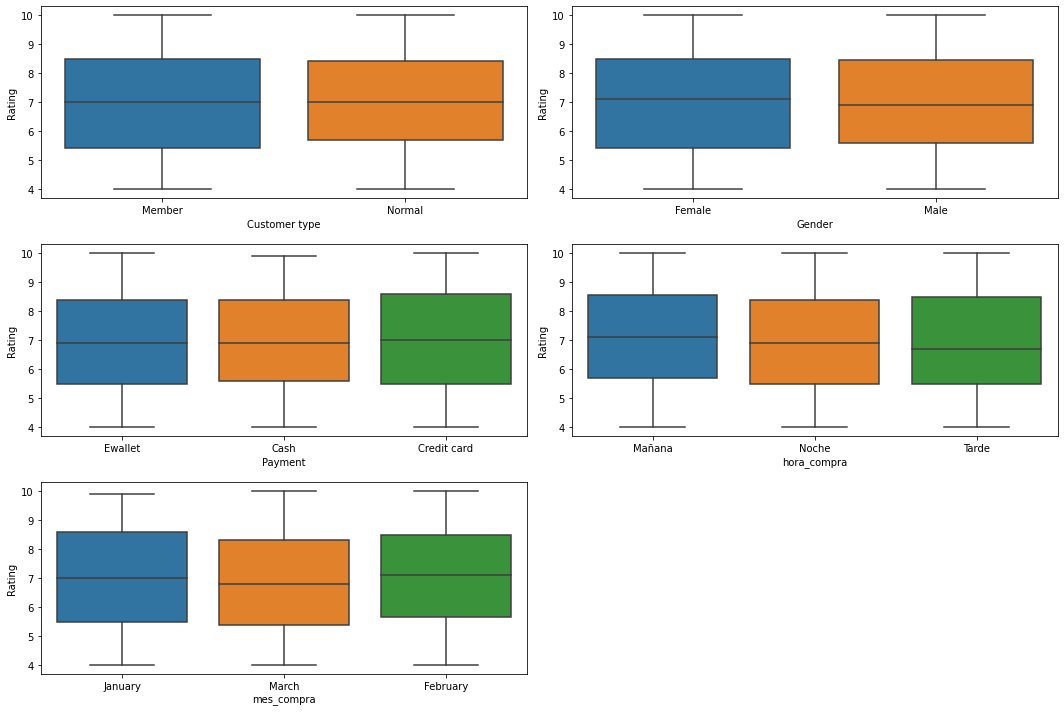

In [4]:
fig, axes = plt.subplots(3, 2, figsize = (15, 10))

axes = axes.flat

for i, columna in enumerate(lista_categoricas):
    sns.boxplot(x=df[columna], y = df["Rating"], data = df, ax = axes[i])
    
plt.tight_layout()
fig.delaxes(axes[-1]) 
plt.show();
    

Vemos que nuestras variables categóricas predictoras son homocedásticas. En este caso se ve visualmente bien y decidimos no aplicar ningún test. Podríamos haber usado Levene o Bartlett.

In [5]:
# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("Rating", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.Rating, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [6]:
resultados

{'Unit price': 0.0,
 'Quantity': 5.057396158167268e-72,
 'Tax 5%': 8.64465835428562e-176,
 'Total': 8.248082173683168e-231}

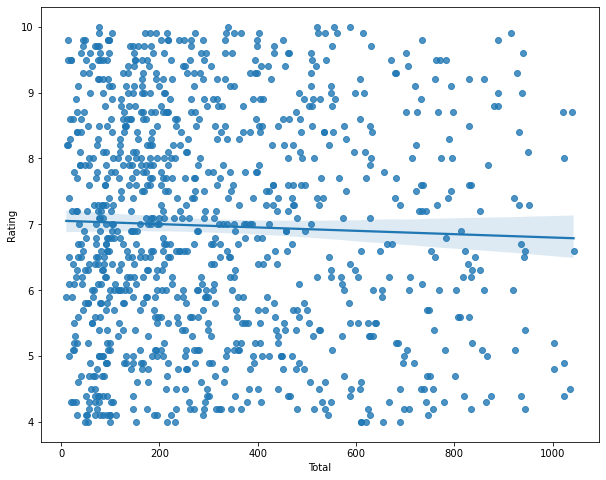

In [7]:
sns.regplot(data = df, x=df["Total"], y = df["Rating"]);

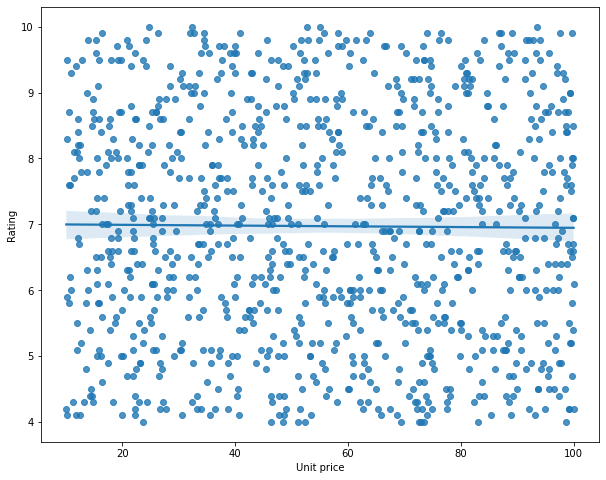

In [8]:

sns.regplot(data = df, x=df["Unit price"], y = df["Rating"]);

Siguiendo lo que habíamos visto ya, en el caso de las variables numéricas la asunción de homocedasticidad no se cumple, por lo tanto no podremos utilizarlas en el modelo de regresión lineal simple. 

        3. Independencia de las variables
    Cada asunción la deberéis testar de forma visual y analítica.

In [9]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,Rating,hora_compra,mes_compra
Invoice ID,,,,,,,,,,,,,
750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,9.1,Mañana,January
226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,9.6,Mañana,March
631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,7.4,Mañana,March
123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,8.4,Noche,January
373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,5.3,Mañana,February


Variables a comprobar: Gender, Payment, hora_compra, mes_compra, Customer_type
Hicimos todas las combinaciones antes de aprender el método combinations.
Dejamos una de muestra y después el método.                       

In [10]:
crosstab, test_results, expected = rp.crosstab(df["Gender"], df["Payment"], 
                                    test = "chi-square", expected_freqs = True, 
                                    prop = "cell")

In [11]:
test_results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,2.9497
1,p-value =,0.2288
2,Cramer's V =,0.0543


Estas dos variables son independientes. El p-value mayor que 0.05 impide rechazar la H0 (las variables son independientes) y el valor de Cramer's V cercano a 0 indica también la independencia de las variables. 

A continuación vamos a revisar el resto de variables categóricas usando el método combinations. 

In [12]:
predictoras = ['Customer type', 'Gender', 'Payment', 'hora_compra', 'mes_compra']

In [13]:
combinaciones = list(combinations(predictoras, 2))
print(combinaciones)

[('Customer type', 'Gender'), ('Customer type', 'Payment'), ('Customer type', 'hora_compra'), ('Customer type', 'mes_compra'), ('Gender', 'Payment'), ('Gender', 'hora_compra'), ('Gender', 'mes_compra'), ('Payment', 'hora_compra'), ('Payment', 'mes_compra'), ('hora_compra', 'mes_compra')]


In [14]:
for i in combinaciones:
    crosstab, test_results, expected = rp.crosstab(df[i[0]], df[i[1]], 
                                    test = "chi-square", expected_freqs = True, 
                                    prop = "cell")
    

    print(f'INDEPENDENCIA ENTRE {i[0]}, {i[1]} \n', test_results)
    print('................................')

INDEPENDENCIA ENTRE Customer type, Gender 
                 Chi-square test  results
0  Pearson Chi-square ( 1.0) =    1.5997
1                    p-value =    0.2059
2               Cramer's phi =    0.0400
................................
INDEPENDENCIA ENTRE Customer type, Payment 
                 Chi-square test  results
0  Pearson Chi-square ( 2.0) =    5.2170
1                    p-value =    0.0736
2                 Cramer's V =    0.0722
................................
INDEPENDENCIA ENTRE Customer type, hora_compra 
                 Chi-square test  results
0  Pearson Chi-square ( 2.0) =    1.7184
1                    p-value =    0.4235
2                 Cramer's V =    0.0415
................................
INDEPENDENCIA ENTRE Customer type, mes_compra 
                 Chi-square test  results
0  Pearson Chi-square ( 2.0) =    2.4136
1                    p-value =    0.2992
2                 Cramer's V =    0.0491
................................
INDEPENDENCIA ENTRE Gender

Recordamos que si  las variables son categóricas, analíticamente utilizamos Chi- cuadrado / V-Cramer. La V-Cramer varía entre 0 a 1:

    - Si el valor es cercano a 1 las variables son dependientes (es como tener un valor de correlación de 1 o -1). El límite para decidir que la independencia no es suficiente es 0.7. 
    
    - Si el valor es cercano a 0 las variables son independientes. 

Todas nuestras variables predictoras son independientes.